In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# TPU SETUP

In [3]:
!pip install -q tensorflow-cloud


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.8.2 requires keras-core, which is not installed.
keras-cv 0.8.2 requires keras-core, which is not installed.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import tensorflow as tf
# Check TPU availability and initialize the TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    strategy = tf.distribute.get_strategy()  # Default strategy that works on CPU and single GPU
    print("Running on CPU or single GPU")

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-05-27 07:13:07.594115: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594220: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594290: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594359: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594421: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594615: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 07:13:07.594709: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)
I

# INSTALLING NECESSARY LIBRARIES 

In [5]:
!pip install statsmodels
!pip install optree
!pip install graphviz
!pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 21.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Time to import useful libraries

In [5]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import h5py
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.ticker as mticker
import warnings
from PIL import Image 
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from statsmodels.stats.proportion import proportion_confint
from IPython.display import clear_output


# Tensorflow Section

In [6]:
# Tensorflow imports
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model  


# Importing custom generators

In [16]:
import sys
sys.path.append("/kaggle/input/custom-py-files")

In [ ]:
# Import custom modules
from paired_image_generator import PairedImageGenerator
from SRNet_model import create_SRNet

# Setup

In [10]:
# Experiment constants
EXPERIMENT_NAME = 'CIPHER_GHOST'
NUM_EPOCHS = 80
BATCH_SIZE = 16
CLASS_MODE = 'binary'
CLASSES = ['0', '1']
INPUT_IMAGE_SIZE = (256, 256, 1)
COLOR_MODE = 'grayscale'
THRESHOLD = 0.5
SEED = 483

In [11]:
# Directories
MODELS_DIR = '/kaggle/working/trained_models'
BASE_DIR = '/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST' 
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')
TEST_DIR = os.path.join(BASE_DIR, 'test')

In [12]:
# Number of train, validation, and test images
NUM_TRAIN = sum([len(files) for _, _, files in os.walk(TRAIN_DIR)])
NUM_VAL = sum([len(files) for _, _, files in os.walk(VAL_DIR)])
NUM_TEST = sum([len(files) for _, _, files in os.walk(TEST_DIR)])
STEPS_PER_EPOCH = None

In [13]:
# Ensure replicability
tf.random.set_seed(SEED)
np.random.seed(seed=SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


In [14]:
# Set up directories for model checkpoints and results
OUTPUT_DIR = '/kaggle/working'
os.makedirs(os.path.join(OUTPUT_DIR, 'checkpoints'), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, 'trained_models'), exist_ok=True)

CHECKPOINT_DIR = os.path.join(MODELS_DIR, EXPERIMENT_NAME, 'checkpoints')


# validation and train generators

In [ ]:

# Image generator creation
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=INPUT_IMAGE_SIZE[0:2],
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    classes=CLASSES,
    color_mode=COLOR_MODE,
    shuffle=False,
    seed=SEED
)

train_generator = PairedImageGenerator(
    dim=(256, 256),
    n_channels=INPUT_IMAGE_SIZE[2],
    batch_size=BATCH_SIZE,
    images_path_cover=os.path.join(TRAIN_DIR, '0'),
    images_path_stego=os.path.join(TRAIN_DIR, '1'),
    shuffle=True,
    augment=True,
    seed=SEED
)

In [42]:

# Load validation images
def load_pgm_images(directory, target_size=(256, 256)):
    images = []
    print(f"Checking directory: {directory}")
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        return np.array(images)
    for root, _, files in os.walk(directory):
        print(f"Files in {root}: {files}")
        for filename in files:
            if filename.endswith('.pgm'):
                try:
                    img_path = os.path.join(root, filename)
                    print(f"Loading image: {img_path}")
                    img = load_img(img_path, target_size=target_size, color_mode='grayscale')
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                except Exception as e:
                    print(f"Failed to load image {filename}: {e}")
    return np.array(images)

val_images = load_pgm_images(validation_data_dir, target_size=(img_height, img_width))

# Print number of validation images loaded
print(f"Number of validation images loaded: {len(val_images)}")


Checking directory: /kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/val
Files in /kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/val: []
Files in /kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/val/0: ['5531.pgm', '1153.pgm', '3540.pgm', '3289.pgm', '1292.pgm', '779.pgm', '5849.pgm', '2076.pgm', '2897.pgm', '1415.pgm', '6612.pgm', '6507.pgm', '1447.pgm', '6383.pgm', '6577.pgm', '280.pgm', '4788.pgm', '5781.pgm', '4325.pgm', '4176.pgm', '8313.pgm', '8853.pgm', '7256.pgm', '4223.pgm', '6682.pgm', '8852.pgm', '3146.pgm', '9903.pgm', '7516.pgm', '4714.pgm', '9206.pgm', '1943.pgm', '320.pgm', '9742.pgm', '831.pgm', '2653.pgm', '4219.pgm', '9273.pgm', '3468.pgm', '2030.pgm', '3786.pgm', '1970.pgm', '2215.pgm', '1721.pgm', '8890.pgm', '1745.pgm', '4282.pgm', '5543.pgm', '4238.pgm', '6768.pgm', '8727.pgm', '3917.pgm', '9143.pgm', '7904.pgm', '4501.pgm', '6533.pgm', '8804.pgm', '2992.pgm', '4184.pgm', '496.pgm', '4243.pgm', '3758.pgm', '107.pgm', '7340.pgm', '384.pgm', '2366.p

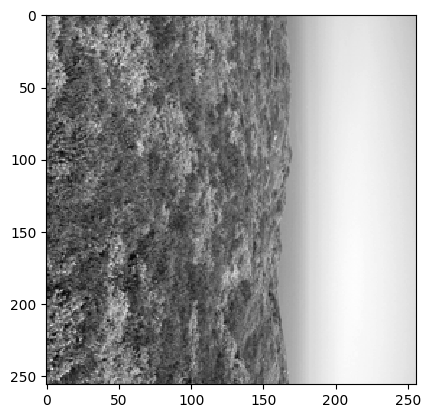

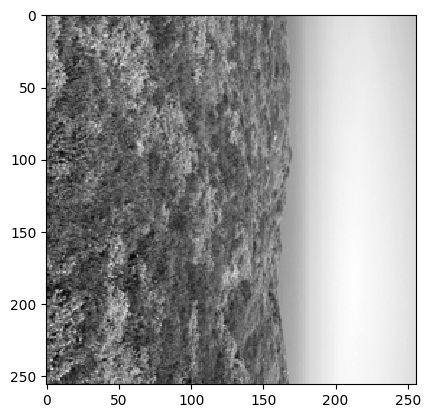

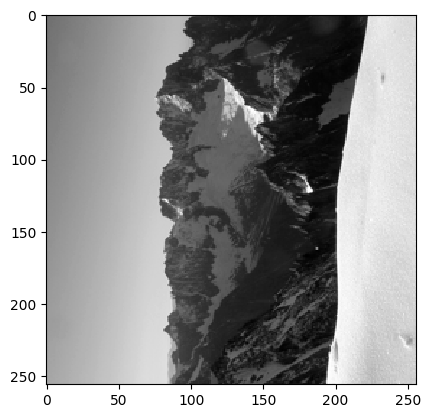

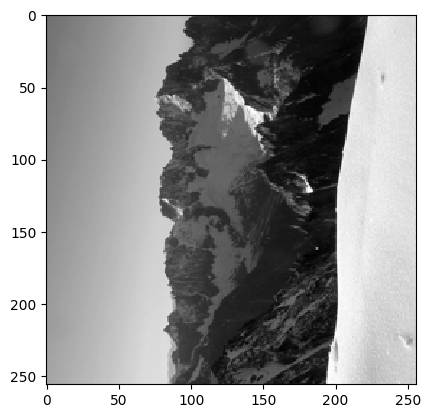

In [16]:
batch = train_generator.__getitem__(1242)

first_images = batch[0][0:4]

# Plot of several images to check how they enter the network
for np_image in first_images:
    plt.imshow(np.reshape(np_image, (256, 256)), interpolation='none', cmap='gray')
    plt.show()

# Testing Images 

In [17]:
import cv2
image_stego = cv2.imread(r"/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/train/1/1.pgm", cv2.IMREAD_UNCHANGED)
image_cover = cv2.imread(r"/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/train/0/1.pgm", cv2.IMREAD_UNCHANGED)
abs(image_cover.astype(np.single)-image_stego.astype(np.single)).mean()

0.033599854

In [18]:
(image_cover-image_stego).mean()

4.281402587890625

In [19]:
image_stego.shape

(256, 256)

In [20]:
image_cover.shape

(256, 256)

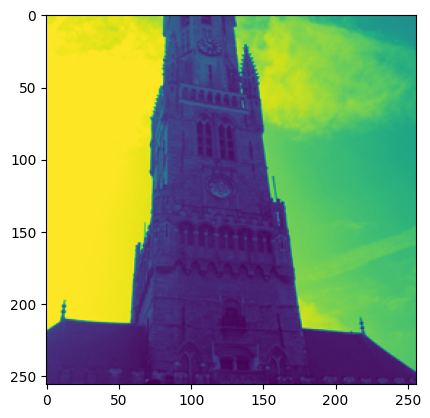

In [21]:
plt.imshow(image_cover)

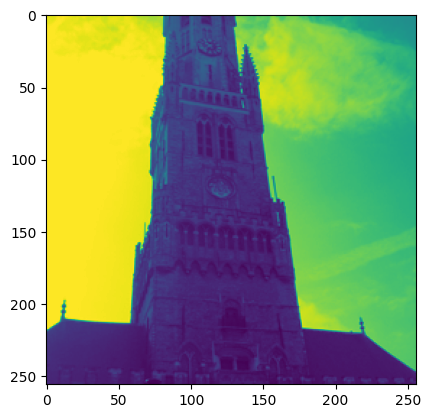

In [22]:
plt.imshow(image_stego)

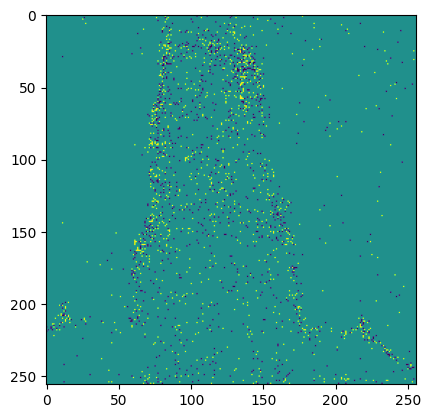

0.0001317641314338235

In [23]:
image_cover = image_cover/255
image_stego = image_stego/255
plt.imshow(image_cover-image_stego)
plt.show()
abs(image_cover-image_stego).mean()

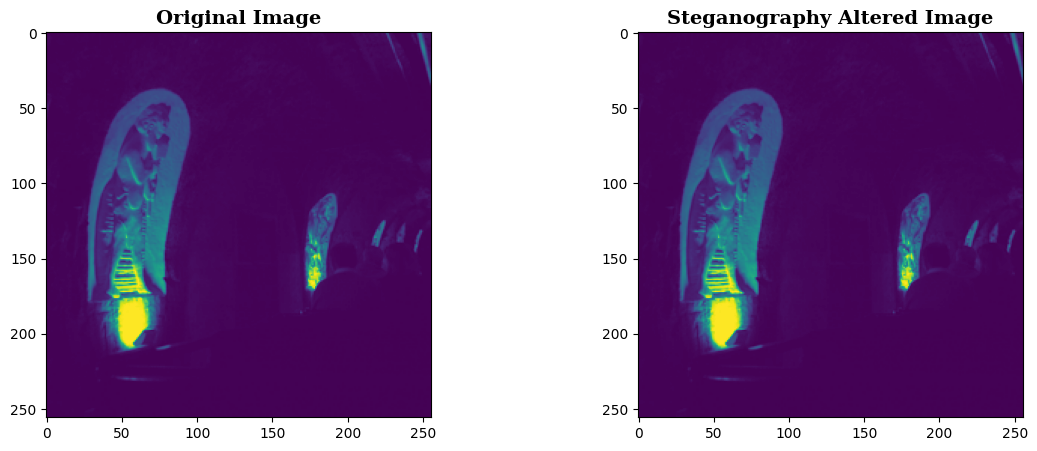

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# See the 2 images side by side.
f, ax = plt.subplots(1, 2, figsize=(14,5))
                           
original = mpimg.imread('/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/test/0/1044.pgm')
original_plot = ax[0].imshow(original)
ax[0].set_title('Original Image', fontsize=14, fontweight='bold', fontfamily='serif')

altered = mpimg.imread('/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/test/1/1044.pgm')
altered_plot = ax[1].imshow(altered)
ax[1].set_title('Steganography Altered Image', fontsize=14, fontweight='bold', fontfamily='serif')  # Add title for the altered image with custom font and size

plt.show()


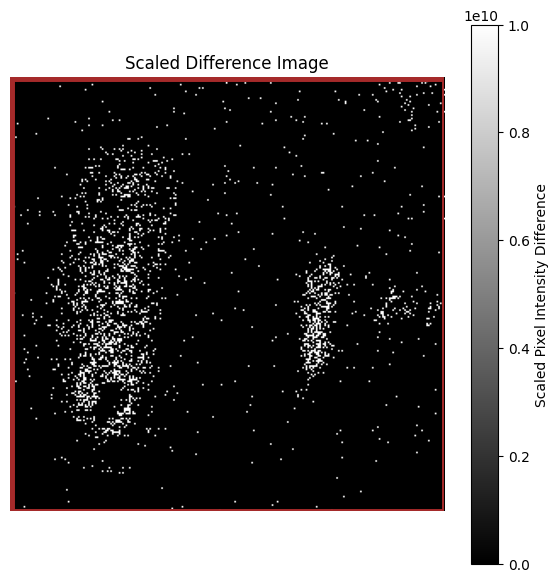

In [25]:
import matplotlib.pyplot as plt #For plotting the outputs.
import matplotlib.image as mpimg #Provides function to read images.
import numpy as np #number manipulation specially for checking the pixel difference.
import matplotlib.patches as patches #for adding a border because our output is white and so is the background of our enviornment.

# Loading the original and altered images.
original = mpimg.imread('/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/test/0/1044.pgm')
altered = mpimg.imread('/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/test/1/1044.pgm')

# Computing the absolute difference between the two images.
diff_image = np.abs(original.astype(int) - altered.astype(int)).astype(np.uint8)

# Scaling the pixel differences to a larger range for better visualization.
diff_image_scaled = diff_image * 10000000000

# Plotting of difference image
plt.figure(figsize=(7, 7))
plt.imshow(diff_image_scaled, cmap='gray')
plt.title('Scaled Difference Image')
plt.axis('off')

# Adding a border around the image
border_color = 'brown'
border_width = 5
plt.gca().add_patch(patches.Rectangle((0, 0), diff_image_scaled.shape[1], diff_image_scaled.shape[0], linewidth=border_width, edgecolor=border_color, facecolor='none'))

plt.colorbar(label='Scaled Pixel Intensity Difference')
plt.show()


In [26]:
image_cover = cv2.imread(r"/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/train/0/1003.pgm", cv2.IMREAD_UNCHANGED)
image_stego = cv2.imread(r"/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/train/1/1003.pgm", cv2.IMREAD_UNCHANGED)


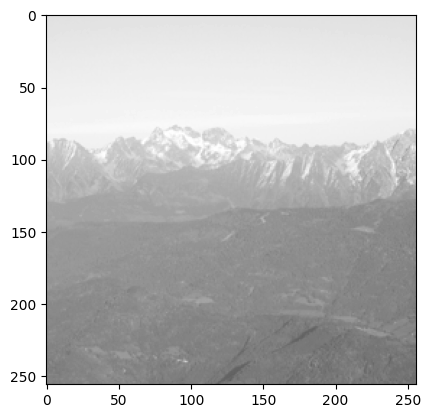

In [27]:
plt.imshow(image_cover,cmap='gray', vmin=0, vmax=255)

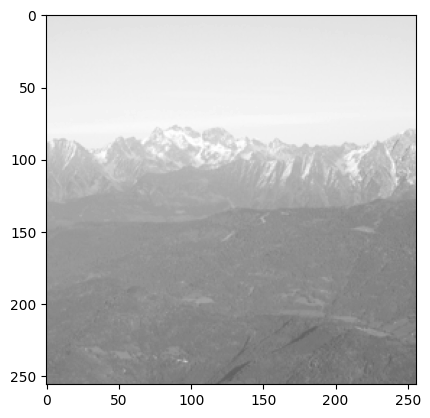

In [28]:
plt.imshow(image_stego,cmap='gray', vmin=0, vmax=255)

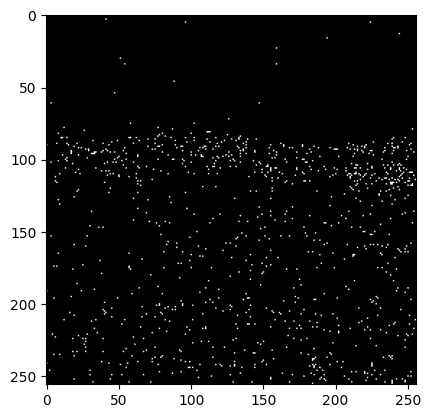

In [29]:
plt.imshow(image_cover-image_stego,cmap='gray', vmin=0, vmax=255)

# Custom Plot learning Generators

In [30]:
from tensorflow import keras
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        try:
            del logs["lr"]
        except:
            pass 
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        try:
            del logs["lr"]
        except:
            pass
          
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x and x != 'val_learning_rate']  # Exclude 'val_learning_rate'
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs.get('val_' + metric):  # Check if 'val_' + metric exists
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()


# Let's Compile the Model now

In [31]:
# Create the model
with strategy.scope():
    model = create_SRNet(INPUT_IMAGE_SIZE)
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        optimizer=optimizers.Adamax(learning_rate=0.001),
        metrics=[
            'accuracy',
            tf.keras.metrics.BinaryCrossentropy(name='val_loss'),  # Validation loss
            tf.keras.metrics.BinaryAccuracy(name='val_accuracy')  # Validation accuracy
        ]
    )


I0000 00:00:1716789892.813983      13 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-05-27 06:04:52.892540: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-05-27 06:04:52.892657: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


# Here is the summary

In [32]:
model.summary()

Model: "SRNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 256, 256, 64)         0         ['batch_normalization[0][0

# Model ploting function

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model, 
    to_file='/kaggle/working/model.png', 
    show_shapes=True, 
    show_dtype=True,
    show_layer_names=True, 
    expand_nested=True, 
    dpi=96
)


# Early stopping if Performance is not improving and training history will be saved as .csv file and best of the best model will be saved as .h5 model

In [33]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=40,
    verbose=0,
    mode='max',
    restore_best_weights=True
)

model_checkpoint = callbacks.ModelCheckpoint(
    os.path.join(OUTPUT_DIR, 'checkpoints', 'best_model.h5'),
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch'
)

def lr_schedule(epoch):
    return 0.001 if epoch <= 40 else 0.0001

learning_rate_scheduler = callbacks.LearningRateScheduler(lr_schedule, verbose=0)
csv_logger = callbacks.CSVLogger(os.path.join(OUTPUT_DIR, 'training_log.csv'), append=True, separator=';')


# Time to train the model

In [ ]:

with strategy.scope():
        # Training
    trainHistory = model.fit(
        train_generator,
        steps_per_epoch=NUM_TRAIN // BATCH_SIZE,
        epochs=NUM_EPOCHS,
        validation_data=val_generator,
        validation_steps=NUM_VAL // BATCH_SIZE,
        callbacks=[csv_logger, early_stopping, model_checkpoint, learning_rate_scheduler,PlotLearning()]
    )
    
    

    

# Load the best_model 

In [34]:
# Load the best model weights from the checkpoint
best_model_path = '/kaggle/input/history/best_model.h5'

In [35]:
best_model = tf.keras.models.load_model(best_model_path)


# Confusion matrix

In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.proportion import proportion_confint
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import tensorflow as tf

def gen_line_plot(df_training_log, metric_name, ax, tick_size):
    sns.lineplot(x=range(1, len(df_training_log) + 1), 
                 y=df_training_log[metric_name], 
                 ax=ax, 
                 label="Train", 
                 palette="tab10")
    sns.lineplot(x=range(1, len(df_training_log) + 1), 
                 y=df_training_log[f'val_{metric_name}'], 
                 ax=ax, 
                 label="Validation", 
                 palette="tab10")
    ax.legend(fontsize=14)
    ax.set_ylabel(metric_name.capitalize(), fontdict={'fontsize':tick_size + 1})
    ticks_loc = ax.get_yticks().tolist()
    ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_yticklabels(['{:.3f}'.format(value) for value in ticks_loc], fontsize=tick_size)

def gen_trend_plot(df_training_log, experiment_name):
    sns.set(style="darkgrid")
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    tick_size = 17
    plt.xlabel('Epoch', fontdict={'fontsize':tick_size + 1})
    plt.tick_params(axis='x', which='major', labelsize=tick_size)
    fig.suptitle(experiment_name + " training trends", fontsize=21)
    plt.tight_layout()
    gen_line_plot(df_training_log, 'accuracy', axes[0], tick_size)
    gen_line_plot(df_training_log, 'loss', axes[1], tick_size)
    plt.savefig(os.path.join('/kaggle/working', experiment_name + '_training_trend.pdf'), bbox_inches='tight')

def get_confidence_interval(success_rate, n, alpha):
    confidence_interval_tuple = proportion_confint(n * success_rate, n, method='wilson', alpha=alpha)
    return tuple([float("{0:.4f}".format(limit)) for limit in confidence_interval_tuple])

def gen_confusion_matrix(predictions, real_labels, experiment_name, threshold=0.5, alpha=0.05):
    sns.set_style("darkgrid")
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    discrete_predicted_labels = np.round(predictions - threshold + 0.5)
    conf_matrix = confusion_matrix(real_labels, discrete_predicted_labels)
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Class 0', 'Class 1'], index=['Class 0', 'Class 1'])
    accuracy = accuracy_score(real_labels, discrete_predicted_labels)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.set(font_scale=2)
    sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', ax=ax, cbar=False)
    label_font = {'size': '16'}
    ax.set_xlabel('Predicted value', fontdict=label_font)
    ax.set_ylabel('True value', fontdict=label_font)
    title_font = {'size': '17'}
    ax.set_title(experiment_name + 
                 ' Confusion matrix' + 
                 '\nValidation accuracy: {0:.3f}'.format(accuracy) + 
                 f'\nConfidence Interval ({alpha}): {str(get_confidence_interval(accuracy, conf_matrix.sum().sum(), alpha)[0])}', 
                 fontdict=title_font)
    plt.savefig(os.path.join('/kaggle/working', experiment_name + '_confusion_matrix.pdf'), bbox_inches='tight')

def load_pgm_images(directory, target_size=(256, 256)):
    images = []
    print(f"Checking directory: {directory}")
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        return np.array(images)
    for root, _, files in os.walk(directory):
        print(f"Files in {root}: {files}")
        for filename in files:
            if filename.endswith('.pgm'):
                try:
                    img_path = os.path.join(root, filename)
                    print(f"Loading image: {img_path}")
                    img = load_img(img_path, target_size=target_size, color_mode='grayscale')
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                except Exception as e:
                    print(f"Failed to load image {filename}: {e}")
    return np.array(images)


In [38]:
# Example parameters
validation_data_dir = '/kaggle/input/cipher-ghost-shadow-script/CIPHER_GHOST/val'  
img_height = 256
img_width = 256
threshold = 0.5
alpha = 0.05
experiment_name = 'CIPHER GHOST'
models_dir = '/kaggle/working'

# Load training history from CSV file
train_history_df = pd.read_csv('/kaggle/input/history/training_log.csv', delimiter=';')

# Print column names
print(train_history_df.columns)


Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


In [ ]:
# Generate predictions for the validation set
if len(val_images) > 0:
    predicted_labels = best_model.predict(val_images, verbose=0).ravel()

    # Assuming you have the real labels for the validation set
    real_labels = np.array([0] * len(val_images))  # Replace with your actual labels

    # Generate confusion matrix and save it
    gen_confusion_matrix(predicted_labels, real_labels, experiment_name, threshold=threshold, alpha=alpha)

    # Save predictions
    output_path = models_dir
    with open(os.path.join(output_path, f'{experiment_name}_raw_prediction.npy'), 'wb') as f:
        np.save(f, predicted_labels)
else:
    print("No validation images were loaded. Please check the directory path and file formats.")


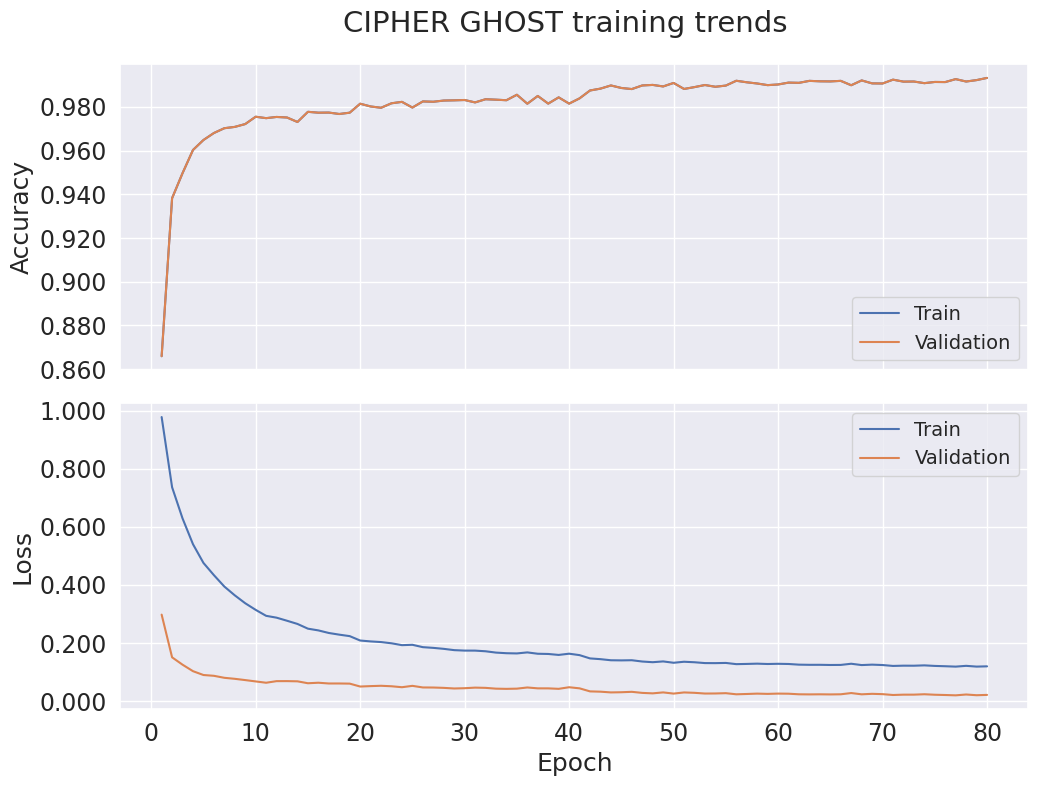

In [39]:
# Generate and save training trend plot
gen_trend_plot(train_history_df, experiment_name)
